In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv('suicide - Sheet1.csv')

In [25]:
dataset.head()

,SUICIDE_ID,SEX,AGE,CASE,RECOVERY_STATUS
0,3569,Female,55,0,1
1,5485,Female,75,1,0
2,2573,Male,35,21,1
3,7224,Male,14,9,0
4,4308,Male,60,16,1


In [26]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [27]:
print(x)

[[55  0]
 [75  1]
 [35 21]
 [14  9]
 [60 16]
 [79  0]
 [17  1]
 [25  1]
 [35  5]
 [ 9  4]
 [60  3]
 [20 17]
 [27  5]
 [40 14]
 [11  4]
 [56 13]
 [23  7]
 [30  8]
 [37  2]
 [ 6  0]]


In [28]:
print(y)

[1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1]


In [29]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [30]:
print(x_train)

[[30  8]
 [17  1]
 [40 14]
 [60 16]
 [35 21]
 [79  0]
 [11  4]
 [ 9  4]
 [25  1]
 [23  7]
 [20 17]
 [14  9]
 [55  0]
 [56 13]
 [27  5]]


In [31]:
len(x_train)

15

In [32]:
len(x)

20

In [33]:
len(x_test)

5

In [34]:
len(y)

20

In [35]:
len(y_test)

5

In [36]:
len(y_train)

15

In [37]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [38]:
print(x_train)

[[-0.17051802  0.        ]
 [-0.82249871 -1.06831847]
 [ 0.33100558  0.91570154]
 [ 1.33405278  1.22093539]
 [ 0.08024378  1.98402001]
 [ 2.28694763 -1.22093539]
 [-1.12341287 -0.6104677 ]
 [-1.22371759 -0.6104677 ]
 [-0.42127983 -1.06831847]
 [-0.52158455 -0.15261692]
 [-0.67204163  1.37355232]
 [-0.97295579  0.15261692]
 [ 1.08329098 -1.22093539]
 [ 1.13344334  0.76308462]
 [-0.32097511 -0.45785077]]


In [39]:
print(x_test)

[[ 0.1805485  -0.91570154]
 [ 2.08633819 -1.06831847]
 [-1.37417467 -1.22093539]
 [ 0.08024378 -0.45785077]
 [ 1.33405278 -0.76308462]]


In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5 , metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 3]
 [1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


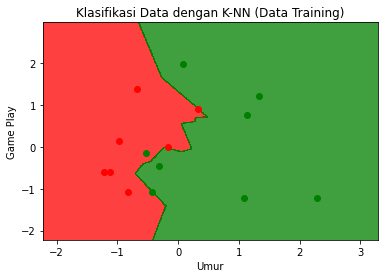

In [43]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(  ('red', 'green'))) 
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max()) 
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)') 
plt.xlabel('Umur') 
plt.ylabel('Game Play') 
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


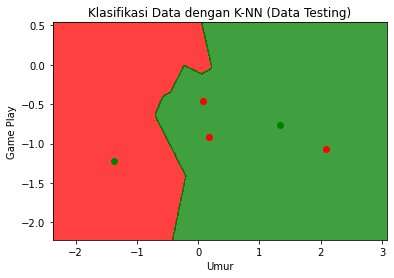

In [44]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(  ('red', 'green'))) 
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max()) 
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)') 
plt.xlabel('Umur') 
plt.ylabel('Game Play') 
plt.show() 